<a href="https://colab.research.google.com/github/themendu/covid_from_ctscan/blob/master/layer_vizualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visualizing what our model learns is equally important as compared to the results of our model(accuracy andrecall score).To know what is being visualized here see my [gitub repo](https://github.com/themendu/covid_from_ctscan)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torchvision
import cv2
from PIL import Image

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device="cpu"
print(device)

cpu


In [0]:
import matplotlib.pyplot as plt
def cv2_imshow(a, **kwargs):
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

    return plt.imshow(a, **kwargs)

In [0]:
from torchvision import transforms
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
              std=[0.229, 0.224, 0.225])])

In [0]:
img = cv2.imread('/content/gdrive/My Drive/corona/ct_dataset/ct_scan/resised/neg/3.jpg')
(height, width,_ )= img.shape

# Cut the image in half
width_cutoff = width // 2
s1 = img[:, :width_cutoff]
s2 = img[:, width_cutoff:]

In [0]:
cv2.imwrite('/content/gdrive/My Drive/corona/ct_dataset/a.png',s1)

True

In [0]:
path1='/content/gdrive/My Drive/corona/ct_dataset/ct_scan/resised/pos/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89_0.png'


In [0]:

model=torch.load('/content/gdrive/My Drive/corona/ct_dataset/ct_scan/best_accuracy.pt',map_location=torch.device('cpu'))

Now a model was evaluated with gradient of the predicted class of a sample image with respect to the model.

In [0]:
from flashtorch.saliency import Backprop
backprop=Backprop(model)

Now all sorts of image input and the model was performed and the final ouput of the visualization function was seen and final decision was taken. Results are posted in my [Github Repo](https://github.com/themendu/covid_from_ctscan)

In [0]:
from flashtorch.utils import apply_transforms, load_image
from torch.autograd import Variable


image=TRANSFORM_IMG(load_image(path1))
image = Variable(image, requires_grad=True)
image = image.unsqueeze(0)

In [0]:
target_class =1

In [0]:
image.shape

torch.Size([1, 3, 224, 224])

In [0]:
gradients=backprop.calculate_gradients(image,target_class,use_gpu=False)
max_gradients=backprop.calculate_gradients(image,target_class,take_max=True,use_gpu=False)


In [0]:

from flashtorch.utils import visualize

The function outputs  the region in the image where gradients were maximized after giving the image as input to the model.

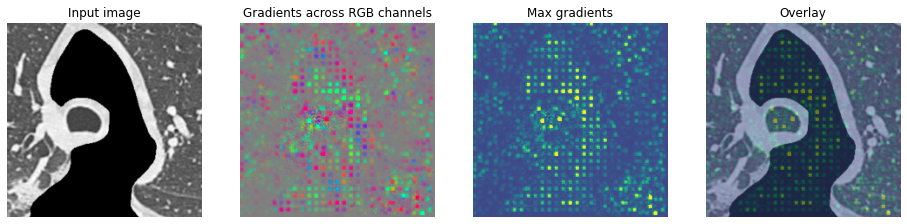

In [0]:
visualize(image,gradients,max_gradients)

In [0]:
pip install flashtorch==0.0.8

  Created wheel for flashtorch: filename=flashtorch-0.0.8-cp36-none-any.whl size=23546 sha256=8147d306b1cef13cd3833ccb35880ca875d1ba092dbf17599dbac196c3c39f45
  Stored in directory: /root/.cache/pip/wheels/b7/a1/83/2aab59ffcfe310accdea6ede1451cc7322f1093a1863024e41
Successfully built flashtorch
